In [1]:
%matplotlib inline
import pandas as pd
import re
from itertools import permutations
from pulp import *
import numpy as np
import random
from random import choice

from itertools import chain


import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import figure

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
#base = pd.read_csv("combined_data/combined_database_pool.csv")
base2 = pd.read_csv('Fantasy_proj/filtered_13.csv')

In [3]:
base2

,Name,Pos,DK points,DK salary
0,"Carr, Derek",QB,35.74,5800
1,"Allen, Josh",QB,34.10,7100
2,"Mayfield, Baker",QB,33.46,5300
3,"Tannehill, Ryan",QB,31.56,6200
4,"Stafford, Matthew",QB,30.08,5700
...,...,...,...,...
280,Arizona,Def,2.00,2900
281,Denver,Def,1.00,1900
282,Dallas,Def,1.00,0
283,Tennessee,Def,-2.00,2900


In [4]:
#dropping useless column
#one =base.drop('Game Info', axis =1)

In [5]:
#dropping useless column
#two = one.drop('Unnamed: 0', axis =1)

In [6]:
#dropping useless column
#three= two.drop('TeamAbbrev', axis=1)


In [7]:
#dropping useless column
#four = three.drop('Name + ID', axis=1)

In [8]:

#player_arr = four.to_numpy()

# creating new dfs for players only of same position 
## Mental note... Make function where we can drop by column names in the future 

In [9]:
# qbs= four[four.Position == 'QB']
# rbs= four[four.Position == 'RB'].drop('ID', axis =1)
# wrs= four[four.Position == 'WR'].drop('ID', axis =1)
# tes= four[four.Position == 'TE'].drop('ID', axis =1)
# #flex= four[four.Position == 'WR'].drop('ID', axis =1)

# #flex = four[four.Position == 'WR' or four[four.Position == 'Rb']
            
# flex = four[(four.Position == 'WR') | (four.Position == 'RB')]
# defs = four[four.Position == 'DST'].drop('ID', axis =1)

# qbs = qbs.drop('ID', axis = 1)

# #had to drop ID off Flex DB again
# flex_no_id =flex.drop('ID', axis =1)


# code above is using another DF 


qbs= base2[base2.Pos == 'QB']
rbs= base2[base2.Pos == 'RB']
wrs= base2[base2.Pos == 'WR']
tes= base2[base2.Pos == 'TE']
flex = base2[(base2.Pos == 'WR') | (base2.Pos == 'RB')]
defs = base2[base2.Pos == 'Def']


#creating top 5 df for each position sorted by salary


rb_sorted = rbs.sort_values('DK salary', ascending = False ).reset_index(drop=True)

wr_sorted = wrs.sort_values('DK salary', ascending = False ).reset_index(drop=True)

te_sorted = tes.sort_values('DK salary', ascending = False ).reset_index(drop=True)

qbs_sorted = qbs.sort_values('DK salary', ascending = False ).reset_index(drop=True)



defs

,Name,Pos,DK points,DK salary
255,New England,Def,31.0,2400
256,Jacksonville,Def,14.0,2000
257,Miami,Def,14.0,4400
258,Minnesota,Def,13.0,3500
259,New York G,Def,13.0,2200
260,Indianapolis,Def,12.0,3000
261,LA Rams,Def,11.0,3200
262,Green Bay,Def,10.0,3800
263,Seattle,Def,9.0,3300
264,Las Vegas,Def,8.0,3400


# creating df of only top 5 to be turned into a np array later



In [10]:
top_rb = rb_sorted.loc[0:4]
top_qb = qbs_sorted.loc[0:4]
top_wr = wr_sorted.loc[0:4]
top_te = te_sorted.loc[0:4]


# Converting each df of specific player positions into numpy arrays

In [162]:
#creating numpy arrays of each type of player to randomly generate teams inside of  function.

#regular df all players for that position
# qbs
# rbs 
# wrs 
# tes
# flex 
#defs


#top 5 player dfs 

# top_rb 
# top_qb 
# top_wr 
# top_te 


#converting top 5 dfs into numpy array
qb_top_arr = top_qb .to_numpy()
wr_top_arr = top_wr.to_numpy()
rb_top_arr = top_rb.to_numpy()
te_top_arr = top_te.to_numpy()


# above is for referencing df name to convert to numpy

qb_arr = qbs.to_numpy()
wr_arr = wrs.to_numpy()
rb_arr = rbs.to_numpy()
te_arr = tes.to_numpy()
flex_arr =flex.to_numpy()
def_array = defs.to_numpy()




In [165]:
#Function that generates a random team of daily fantasy football players.... duplicate teams not considered
#It is very unlikely to generate two of the exact same team.

def team_generator(qb, wr, rb, flex, te, defense):
    team_list = []
    
    
    
    #Targeting the rows of QB player information from each array
    qb_rows = qb.shape[0]
    random_indices = np.random.choice(qb_rows, size=1, replace=False)
    qb_rows = qb[random_indices, :]
    
    
    #Targeting the rows of WR player information from each array
    wr_rows = wr.shape[0]
    random_indices = np.random.choice(wr_rows, size=3, replace=False)
    wr_rows = wr[random_indices, :]
    
    #Targeting the rows of RB player information from each array
    rb_rows = rb.shape[0]
    random_indices = np.random.choice(rb_rows, size=2, replace=False)
    rb_rows = rb[random_indices, :]
    
    
    #Targeting the rows of FLEX player information from each array
    flex_rows = flex.shape[0]
    random_indices = np.random.choice(flex_rows, size=1, replace=False)
    flex_rows = flex[random_indices, :]
    
    
    #Targeting the rows of TE player information from each array
    te_rows = te.shape[0]
    random_indices = np.random.choice(te_rows, size=1, replace=False)
    te_rows = te[random_indices, :]
    
    #Targeting rows of defenses available
    def_rows = defense.shape[0]
    random_indices = np.random.choice(def_rows, size=1, replace=False)
    def_rows = defense[random_indices, :]
    
    
    
    # appending each row to team list for player position to create a team
    team_list.append(qb_rows)
    team_list.append(wr_rows)
    team_list.append(rb_rows)
    team_list.append(flex_rows)
    team_list.append(te_rows)
    team_list.append(def_rows)
    
    #unpacking team list for nested lists
    unpack_team = list(chain.from_iterable(team_list))
    
    un_pack_pd = pd.DataFrame(unpack_team)
    
     
        
    salary_total = un_pack_pd[3].sum()
    
    point_total = un_pack_pd[2].sum()
    
    
    
 
    
    if (salary_total < 44000) or (salary_total > 50000):
        
        team_list.clear()
        
        return team_generator(qb, wr, rb, flex, te, defense)
        
        
    else:
        
        return point_total, unpack_team

    
    
point_total = team_generator(qb_arr, wr_arr, rb_top_arr, flex_arr, te_top_arr, def_array)




point_total



(164.2,
 [array(['Rivers, Philip', 'QB', 19.2, 5900], dtype=object),
  array(['Boyd, Tyler', 'WR', 14.2, 4700], dtype=object),
  array(['Watkins, Sammy', 'WR', 7.5, 4800], dtype=object),
  array(['Gage, Russell', 'WR', 15.1, 4500], dtype=object),
  array(['Cook, Dalvin', 'RB', 26.9, 9500], dtype=object),
  array(['Robinson, James', 'RB', 22.8, 7300], dtype=object),
  array(["Bell, Le'Veon", 'RB', 7.5, 4400], dtype=object),
  array(['Waller, Darren', 'TE', 48.0, 6100], dtype=object),
  array(['Houston', 'Def', 3.0, 2800], dtype=object)])

In [39]:
#function that generates 1000 different samples

def sample_generator(samples = 1000):

    sample_list = []
    
    #generating 1000 samples by calling team generator function:
    
    for _ in range(samples):
        sample_list.append(team_generator(qb_arr, wr_arr, rb_arr, flex_arr, te_top_arr, def_array))
        
    unpack_samples = list(chain.from_iterable(sample_list))
    
    convert_to_pd = pd.DataFrame(unpack_samples)
    
#     convert_to_pd.columns = ['pos', 'name', 'fant_pos', 'salary', 'proj_point']
    
    salary_series = pd.Series(sample_list)
    
    return salary_series, unpack_samples


salary, teams  = sample_generator(1000)


#team_samps, salary_list  = sample_generator(10)




count    1000.000000
mean      119.119560
std        25.497182
min        52.220000
25%       100.855000
50%       117.970000
75%       136.180000
max       213.080000
dtype: float64

In [130]:
tte

0       87.34
1       67.52
2      136.24
3      108.24
4       87.88
        ...  
995    179.50
996    104.86
997    147.26
998    130.70
999     70.42
Length: 1000, dtype: float64

#creating different samples for each filter case on base pool

In [40]:
# # base pool is where no players are filtered
base_pool = bs

#print (base_pool.describe())


# # # # player pool is where qbs are filtered for only top 5
qb_samples  = qqb

# print (qb_samples.describe())

# # # player pool is where wrs are filtered for only top 5
wr_samples = wwr
# print (wr_samples.describe())

# # # player pool is where rbs are filtered for only top 5
rb_samples = rrb
# print (rb_samples.describe())

# # # player pool is where tes are filtered for only top 5
te_samples = tte
# print (te_samples.describe())

# qb_samples 


In [41]:
qb_samples.describe()

count    1000.000000
mean      107.636920
std        22.934899
min        54.920000
25%        91.740000
50%       106.070000
75%       122.400000
max       209.720000
dtype: float64

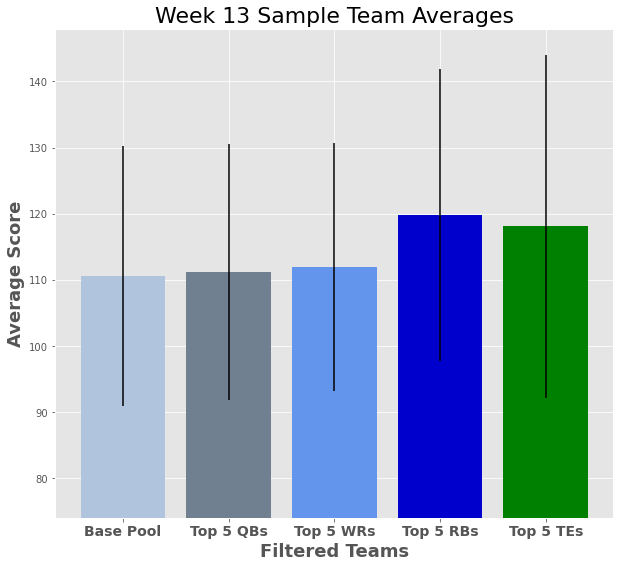

In [129]:
import math
x = ['Base Pool', 'Top 5 QBs', 'Top 5 WRs', 'Top 5 RBs', 'Top 5 TEs']
ave_score = [110.54, 111.18, 111.95, 119.79, 118.10]
sd = [19.64, 19.37, 18.76, 22.11, 25.97]

maxy = [178.94, 178.90, 170.54, 198.68, 202.38]

mini = [64.24, 66.62, 61.98, 48.16, 35.34  ]

x_pos = np.arange(1,6)


plt.bar(x_pos, ave_score, color=['lightsteelblue', 'slategray', 'cornflowerblue', 'mediumblue', 'green'], yerr=sd, linewidth=20)
plt.xlabel("Filtered Teams", fontsize=18, weight = 'bold')
plt.ylabel("Average Score", fontsize=18, weight = 'bold')
plt.title("Week 13 Sample Team Averages", fontsize=22)
plt.rcParams["figure.figsize"] = (10,9)






low = min(ave_score)
high = max(ave_score)
plt.ylim([math.ceil(low-4*(high-low)), math.ceil(high+3*(high-low))])




plt.xticks(x_pos, x, fontsize = 14, weight = 'bold')

plt.show()

#interval standard deviation from mean

In [43]:
#plt.bar([1,2,3,4], [2,2.5,5,3], bottom=[0,-1,1,2])

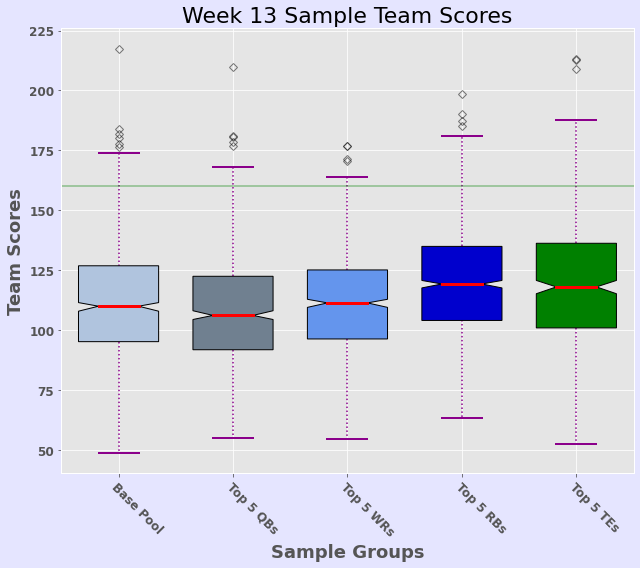

In [262]:
import matplotlib.pyplot as plt 
import numpy as np 
 
    
x = ['Base Pool', 'Top 5 QBs', 'Top 5 WRs', 'Top 5 RBs', 'Top 5 TEs']
ave_score = [110.54, 111.18, 111.95, 119.79, 118.10]
sd = [19.64, 19.37, 18.76, 22.11, 25.97]

maxy = [178.94, 178.90, 170.54, 198.68, 202.38]

mini = [64.24, 66.62, 61.98, 48.16, 35.34  ]

x_pos = np.arange(1,6)


# Creating dataset 
data = [base_pool, qb_samples, wr_samples, rb_samples, te_samples] 
  
fig = plt.figure(figsize =(9, 8)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, bootstrap=1000, 
                notch ='True', vert = 1, widths=.7 )
  
colors = ['lightsteelblue', 'slategray', 'cornflowerblue', 'mediumblue', 'green'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
plt.xlabel("Sample Groups", fontsize=18, weight = 'bold')
plt.ylabel("Team Scores", fontsize=18, weight = 'bold')




y=160  
h=210
# Adding title  
plt.title("Week 13 Sample Team Scores", fontsize=22)
plt.xticks(x_pos, x, fontsize = 12, weight = 'bold')
plt.axhline(y=y, color='g', linestyle='-', alpha = .4, label = '$$')
#plt.text(4, 1, ' somelabel1', ha='left', va='center')
fig.patch.set_alpha(0.1)
fig.set_facecolor('b')


plt.yticks(fontsize =12 , weight = 'bold')

#plt.text('$$', ha='left', va='center')

plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")   
plt.tight_layout()


      
# show plot 

plt.savefig('boxplt.jpg', dpi=50, format='jpg')
plt.show(bp) 

# Comparing Filtered Pools Against base pool

None


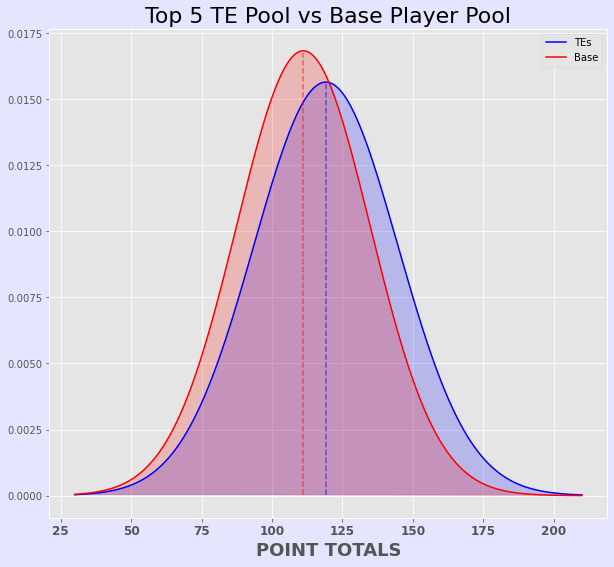

In [256]:
def plot_compare(base_pool, player_pool, support = np.linspace(30, 210, 1000)):


    #creating distribution and variable to plot
    
    player_pool_dist = stats.norm(player_pool.mean(), player_pool.std() )
    base_dist = stats.norm(base_pool.mean(), base_pool.std())
    
    
    #creating PDF for pool to go along with support 
    compare_pdf = player_pool_dist.pdf(support)
    base_pdf = base_dist.pdf(support)
    
    # Creating a plot
    fig,ax = plt.subplots()

    ax.plot(support, compare_pdf, color='blue', label='TEs')
    ax.fill(support, compare_pdf, color='blue', alpha=0.2)
    ax.plot(support, base_pdf, color='red', label='Base')
    ax.fill(support, base_pdf, color='red', alpha=0.2)
    ax.legend()
    fig.patch.set_alpha(0.1)
    fig.set_facecolor('b')
    plt.xlabel("POINT TOTALS", fontsize=18, weight = 'bold')
    plt.xticks(fontsize = 12, weight = 'bold')
    #ax.axvspan(base.mean(), te_samples.mean(), ymin=.046, alpha=0.2, color='black')
    #ax.fill_between(base.mean(), te_samples.mean())
    
    ax.set_title("Top 5 TE Pool vs Base Player Pool", fontsize=22)
    #ax.axvline(critical_value1, alpha = .5)
    
    ax.axvline(x = base_pool.mean(), ymin=.046, ymax = .95, color='red', alpha = .5, linestyle = '--')
    ax.axvline(x = player_pool.mean(), ymin=.046, ymax = .89, color='blue', alpha = .5, linestyle = '--')
    
#     plt.savefig('TE.jpg', dpi=100, format='jpg')
    
    
print (plot_compare(base, te_samples))

In [68]:
# base pool vs top 5 RBs
# initial test base pool vs qbs
qb_dist = stats.norm(qb_samples.mean(), qb_samples.std() )
base = stats.norm(base_pool.mean(), base_pool.std())

support = np.linspace(25, 220, 1000)

qb_pdf = qb_dist.pdf(support)
base_pdf = base.pdf(support)


print(1 - base.cdf(qb_samples.mean()))

# what's the threshhold at alpha = 0.05
print(base.ppf(0.60))
n=1000

critical_value1 = stats.norm(base_pool.mean(), base_pool.std()).ppf(0.95)
critical_value1

critical_value_dist = stats.norm(0.3, qb_samples.std())
critical_value = critical_value_dist.ppf(0.95)

critical_value1

0.558732964699757
117.14387471830368


150.12526172214473

In [53]:
#seeing what sample size is needed to determine if qb sample mean is actually different than the base pool


def sample_size(sigma, alpha, beta, effect_size):
    '''
    Get the required sample size for a given sigma, alpha, beta, and effect size
    
    Parameters:
    ----------
    sigma (float): the standard deviation of the population
    alpha (float): the maximum acceptable false positive rate
    beta (float): the maximum acceptable false negative rate
    effect_size (float): minimum true distance between null hypothesis mean and alternative hypothesis mean
    
    Returns:
    --------
    n (int): sample size 
    '''
    standard_normal = stats.norm(0,1)
    
    sample_size_float = (sigma * (standard_normal.ppf(1-alpha) - standard_normal.ppf(beta)) / effect_size) **2
    n = int(sample_size_float)
    
    return(n)

In [54]:
sample_size(19.64, 0.05, 0.1, 1.817)

1000

In [143]:
stats.f_oneway(base_pool, te_samples)

F_onewayResult(statistic=52.55303934909718, pvalue=5.95772683661343e-13)

In [144]:
stats.ttest_ind(base_pool, te_samples)

Ttest_indResult(statistic=-7.249347511955615, pvalue=5.957726836616097e-13)

In [145]:
stats.ttest_ind(base_pool, qb_samples)

Ttest_indResult(statistic=3.357846009870451, pvalue=0.000800262874062739)

In [146]:
stats.ttest_ind(base_pool, rb_samples)

Ttest_indResult(statistic=-8.6441945913627, pvalue=1.0910917663295008e-17)

In [147]:
stats.ttest_ind(base_pool, wr_samples)

Ttest_indResult(statistic=0.11571656241969287, pvalue=0.9078888079698677)

# performing bootstrap sampling means from different player pools

In [184]:
#bootstrapping base means

bootstrap_base_means = []
for i in range(1000):
    bootstrap_base_means.append(np.mean(np.random.choice(base_pool, 100, replace=True)))

In [227]:
#bootstrapping rb means

bootstrap_rb_means = []
for i in range(1000):
    bootstrap_rb_means.append(np.mean(np.random.choice(rb_samples, 100, replace=True)))
    
bootstrap_rb_means

[117.264,
 120.68240000000002,
 117.1092,
 120.8032,
 120.93059999999997,
 119.0888,
 119.05699999999999,
 119.60079999999999,
 121.52780000000003,
 120.43000000000002,
 122.6032,
 119.316,
 122.09720000000002,
 119.01260000000002,
 119.46480000000001,
 124.39460000000001,
 117.05760000000002,
 118.18780000000001,
 121.41180000000003,
 122.20080000000002,
 121.18039999999999,
 121.054,
 122.62860000000002,
 120.1936,
 119.50220000000002,
 118.52619999999999,
 117.54279999999999,
 119.8646,
 117.66679999999998,
 119.37420000000002,
 122.9422,
 123.07480000000001,
 121.7984,
 117.39920000000001,
 120.52860000000001,
 120.41220000000003,
 120.64740000000003,
 117.58200000000001,
 119.6776,
 123.23199999999999,
 119.62980000000002,
 118.89120000000001,
 122.3594,
 121.3768,
 122.89179999999999,
 122.18220000000002,
 121.18280000000004,
 123.8462,
 122.28340000000001,
 126.4258,
 119.93840000000002,
 121.1082,
 116.57700000000001,
 121.22160000000002,
 117.59300000000002,
 121.4378000000000

In [204]:
#Bootstrapping te means

bootstrap_te_means = []
for i in range(1000):
    bootstrap_te_means.append(np.mean(np.random.choice(te_samples, 100, replace=True)))
    
    
    
    
bootstrap_te_means

[123.50500000000002,
 119.73020000000002,
 118.25959999999999,
 121.0192,
 121.278,
 118.95779999999999,
 117.44940000000001,
 115.67200000000001,
 121.9094,
 121.10579999999999,
 114.69380000000001,
 116.0706,
 117.3476,
 117.40540000000001,
 120.27600000000001,
 120.21979999999999,
 117.94179999999999,
 115.95380000000002,
 116.41060000000002,
 121.8302,
 117.52739999999999,
 120.78579999999998,
 123.70379999999999,
 117.49959999999999,
 117.1166,
 119.13500000000002,
 116.9822,
 120.46979999999999,
 118.818,
 121.1186,
 119.18619999999999,
 115.31199999999998,
 116.66300000000001,
 118.11319999999998,
 115.55700000000003,
 123.01619999999998,
 117.73239999999998,
 120.69419999999998,
 123.35380000000004,
 118.1754,
 120.2668,
 120.5018,
 116.59760000000001,
 122.68119999999999,
 119.2976,
 121.204,
 123.19739999999997,
 120.38279999999999,
 119.69120000000001,
 124.16079999999998,
 118.9646,
 117.25039999999998,
 118.8,
 114.26360000000001,
 120.69800000000001,
 124.9534,
 123.50699

# plotting the bootstrapped means

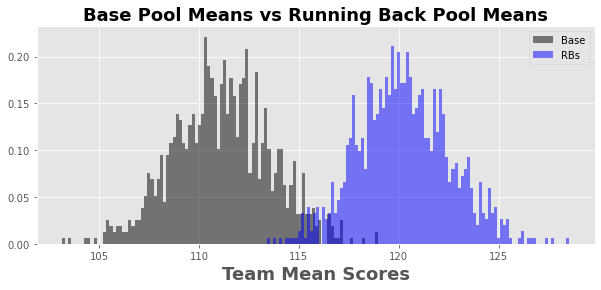

In [257]:
def bootstrapper(pool_1, pool_2):

    fig, ax = plt.subplots(1, figsize=(10, 4))
    ax.hist(pool_1, bins=100, density=True, color="black", alpha=0.5, label='Base')
    ax.hist(pool_2, bins=100, density=True, color="blue", alpha=0.5, label='RBs')
    ax.set_title(label = "Base Pool Means vs Running Back Pool Means", fontsize=18, weight = 'bold')
    plt.xlabel("Team Mean Scores", fontsize=18, weight = 'bold')
    ax.legend()
    
bootstrapper(bootstrap_base_means, bootstrap_rb_means)


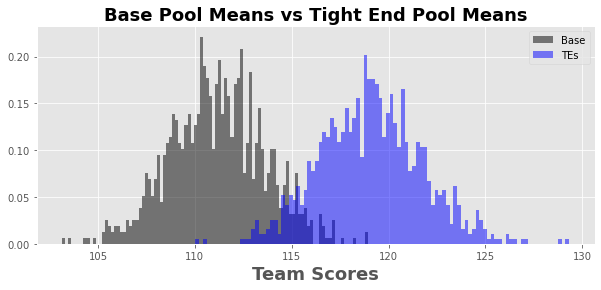

In [246]:
def bootstrapper(pool_1, pool_2):

    fig, ax = plt.subplots(1, figsize=(10, 4))
    ax.hist(pool_1, bins=100, density=True, color="black", alpha=0.5, label='Base')
    ax.hist(pool_2, bins=100, density=True, color="blue", alpha=0.5, label='TEs')
    ax.set_title(label = "Base Pool Means vs Tight End Pool Means", fontsize=18, weight = 'bold')
    plt.xlabel("Team Scores", fontsize=18, weight = 'bold')
    ax.legend()
    
bootstrapper(bootstrap_base_means, bootstrap_te_means)
